<a href="https://colab.research.google.com/github/Percy-O/Epidemic-Outbreaks/blob/main/Epidemic_Outbreaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import numpy as np # Mathematical Calculation
import pandas as pd # Data Manipulation
import seaborn as sns # Data Visualization
import warnings # Ignore Warnings in the code
import matplotlib.pyplot as plt # Data Visualization
%matplotlib inline

warnings.filterwarnings('ignore')

# Loading Dataset

In [ ]:
data = pd.read_csv('drive/MyDrive/Outbreaks/Outbreaks.csv')
data.head()

,Unnamed: 0,Country,iso2,iso3,Year,icd10n,icd103n,icd104n,icd10c,icd103c,icd104c,icd11c1,icd11c2,icd11c3,icd11l1,icd11l2,icd11l3,Disease,DONs,Definition
0,1,Afghanistan,AF,AFG,2000,Arthropod-borne viral fevers and viral haemorr...,Unspecified viral haemorrhagic fever,Unspecified viral haemorrhagic fever,A92-A99,A99,A990,1,D86,1D86,Certain infectious or parasitic diseases,Certain other viral diseases,"Viral haemorrhagic fever, not elsewhere classi...",Unspecified viral haemorrhagic fever,"DON0404, DON0399",NaN
1,2,Afghanistan,AF,AFG,2002,Intestinal infectious diseases,Other gastroenteritis and colitis of infectiou...,Other and unspecified gastroenteritis and coli...,A00-A09,A09,A090,1,A40,1A40,Certain infectious or parasitic diseases,Gastroenteritis or colitis of infectious origin,Gastroenteritis or colitis without specificati...,Infectious gastroenteritis or colitis without ...,DON0607,NaN
2,3,Afghanistan,AF,AFG,1998,Intestinal infectious diseases,Cholera,Classical cholera,A00-A09,A00,A000,1,A00,1A00,Certain infectious or parasitic diseases,Gastroenteritis or colitis of infectious origin,Bacterial intestinal infections,Cholera,"DON0253, DON0249, DON0248",Intestinal infection due to Vibrio cholerae
3,4,Afghanistan,AF,AFG,1999,Codes for special purposes,Provisional assignment of new diseases of unce...,Severe acute respiratory syndrome [SARS],U00-U49,U04,U049,1,D65,1D65,Certain infectious or parasitic diseases,Certain zoonotic viral diseases,Severe acute respiratory syndrome,Severe acute respiratory syndrome,DON0294,"A disease of the respiratory system, caused by..."
4,5,Afghanistan,AF,AFG,2000,Intestinal infectious diseases,Cholera,Classical cholera,A00-A09,A00,A000,1,A00,1A00,Certain infectious or parasitic diseases,Gastroenteritis or colitis of infectious origin,Bacterial intestinal infections,Cholera,DON0413,Intestinal infection due to Vibrio cholerae


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dropping Unnamed Column

In [ ]:
data = data.drop('Unnamed: 0',axis=1)

## Check if Null Fields Exists
* If Exists Then drop those fields/row

In [ ]:
data.isnull().sum()

Country         0
iso2            4
iso3            0
Year            0
icd10n          0
icd103n         0
icd104n         0
icd10c          0
icd103c         0
icd104c         0
icd11c1         0
icd11c2         0
icd11c3         0
icd11l1         0
icd11l2        12
icd11l3        12
Disease         0
DONs            0
Definition    100
dtype: int64

## Droping Null Fields/Row

In [ ]:
data = data.dropna()
data.head()

,Country,iso2,iso3,Year,icd10n,icd103n,icd104n,icd10c,icd103c,icd104c,icd11c1,icd11c2,icd11c3,icd11l1,icd11l2,icd11l3,Disease,DONs,Definition
2,Afghanistan,AF,AFG,1998,Intestinal infectious diseases,Cholera,Classical cholera,A00-A09,A00,A000,1,A00,1A00,Certain infectious or parasitic diseases,Gastroenteritis or colitis of infectious origin,Bacterial intestinal infections,Cholera,"DON0253, DON0249, DON0248",Intestinal infection due to Vibrio cholerae
3,Afghanistan,AF,AFG,1999,Codes for special purposes,Provisional assignment of new diseases of unce...,Severe acute respiratory syndrome [SARS],U00-U49,U04,U049,1,D65,1D65,Certain infectious or parasitic diseases,Certain zoonotic viral diseases,Severe acute respiratory syndrome,Severe acute respiratory syndrome,DON0294,"A disease of the respiratory system, caused by..."
4,Afghanistan,AF,AFG,2000,Intestinal infectious diseases,Cholera,Classical cholera,A00-A09,A00,A000,1,A00,1A00,Certain infectious or parasitic diseases,Gastroenteritis or colitis of infectious origin,Bacterial intestinal infections,Cholera,DON0413,Intestinal infection due to Vibrio cholerae
5,Afghanistan,AF,AFG,2005,Intestinal infectious diseases,Cholera,Classical cholera,A00-A09,A00,A000,1,A00,1A00,Certain infectious or parasitic diseases,Gastroenteritis or colitis of infectious origin,Bacterial intestinal infections,Cholera,DON0995,Intestinal infection due to Vibrio cholerae
6,Afghanistan,AF,AFG,1999,Intestinal infectious diseases,Cholera,Classical cholera,A00-A09,A00,A000,1,A00,1A00,Certain infectious or parasitic diseases,Gastroenteritis or colitis of infectious origin,Bacterial intestinal infections,Cholera,"DON0335, DON0338, DON0348",Intestinal infection due to Vibrio cholerae


In [ ]:
# recheck if there are still null values
data.isnull().sum().sum()

0

## Data Shape

In [ ]:
data.shape

(2123, 19)

#Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 2 to 2226
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     2123 non-null   object
 1   iso2        2123 non-null   object
 2   iso3        2123 non-null   object
 3   Year        2123 non-null   int64 
 4   icd10n      2123 non-null   object
 5   icd103n     2123 non-null   object
 6   icd104n     2123 non-null   object
 7   icd10c      2123 non-null   object
 8   icd103c     2123 non-null   object
 9   icd104c     2123 non-null   object
 10  icd11c1     2123 non-null   object
 11  icd11c2     2123 non-null   object
 12  icd11c3     2123 non-null   object
 13  icd11l1     2123 non-null   object
 14  icd11l2     2123 non-null   object
 15  icd11l3     2123 non-null   object
 16  Disease     2123 non-null   object
 17  DONs        2123 non-null   object
 18  Definition  2123 non-null   object
dtypes: int64(1), object(18)
memory usage: 331.7+ KB


# Distributing the columns into their categories
* Checking the data types

In [ ]:
# Categorical Data types
categorical = data.select_dtypes(include=['object']).columns
# Numerical data types
numerical = data.select_dtypes(include=['float','int']).columns

print('Categorial \n {categorical}'.format(categorical=categorical))
print('Numerical \n {numerical}'.format(numerical=numerical))

Categorial 
 Index(['Country', 'iso2', 'iso3', 'icd10n', 'icd103n', 'icd104n', 'icd10c',
       'icd103c', 'icd104c', 'icd11c1', 'icd11c2', 'icd11c3', 'icd11l1',
       'icd11l2', 'icd11l3', 'Disease', 'DONs', 'Definition'],
      dtype='object')
Numerical 
 Index(['Year'], dtype='object')


#Data Statistics

* For both Numerical and Categorical

In [ ]:
# Numerical Data Statistics
data[numerical].describe()

,Year
count,2123.000000
mean,2012.522374
std,8.451717
min,1996.000000
25%,2006.000000
50%,2015.000000
75%,2020.000000
max,2022.000000


In [ ]:
# Categorical Data Statistics
data[categorical].describe()

,Country,iso2,iso3,icd10n,icd103n,icd104n,icd10c,icd103c,icd104c,icd11c1,icd11c2,icd11c3,icd11l1,icd11l2,icd11l3,Disease,DONs,Definition
count,2123,2123,2123,2123,2123,2123,2123,2123,2123,2123,2123,2123,2123,2123,2123,2123,2123,2123
unique,232,232,232,19,46,59,18,45,59,5,54,54,5,21,49,59,1135,57
top,Congo Democratic Republic of the,CD,COD,Provisional assignment of new diseases of unce...,Emergency use of U07,"COVID-19, virus identified",U00-U49,U07,U071,1,RA01,25RA01,Certain infectious or parasitic diseases,International provisional assignment of new di...,COVID-19,COVID-19,Coronavirus dashboard,Infectious disease caused by the SARS-CoV-2 vi...
freq,50,50,50,732,665,665,764,665,665,1454,665,665,1454,665,665,665,665,665


# Prunning the data and deleteing diseases that has less ocurrence

In [ ]:
import pandas as pd

unique_diseases = data['Disease'].unique()

# Find rows where each unique disease occurs
occurrences = [data[data['Disease'] == disease] for disease in unique_diseases]

# Filter out diseases with 20 occurrences or more
filtered_diseases = [disease for disease, occurrence in zip(unique_diseases, occurrences) if len(occurrence) >= 20]

# Display filtered diseases
print(filtered_diseases)

In [ ]:
new_data = data[data['Disease'].isin(filtered_diseases)]
new_data['Disease'].value_counts()

COVID-19                                                             665
 Influenza due to identified zoonotic or pandemic influenza virus    408
Cholera                                                              167
Acute poliomyelitis, unspecified                                     111
Yellow fever, unspecified                                            104
Meningococcal meningitis                                              95
Measles                                                               83
Middle East respiratory syndrome                                      67
Dengue fever, unspecified                                             50
Viral meningitis not elsewhere classified, unspecified                44
Zika virus disease                                                    37
Ebola disease                                                         33
Severe acute respiratory syndrome                                     32
Lassa fever                                        

# Exploratory Data Analysis

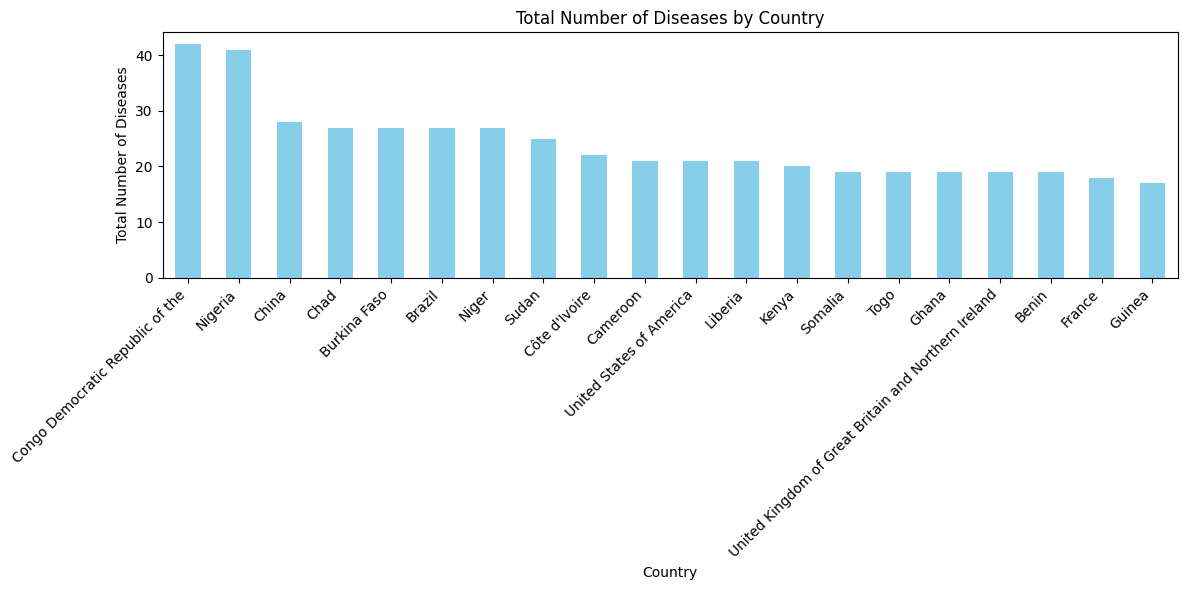

In [ ]:
# Group the data by 'Country' and count the occurrences of each disease
country_disease_counts = new_data.groupby('Country')['Disease'].value_counts()
# Sum the counts for each country
total_diseases_by_country = country_disease_counts.groupby('Country').sum()

# Sort countries by the total number of diseases in descending order
sorted_countries = total_diseases_by_country.sort_values(ascending=False)[:20]
# Plotting
plt.figure(figsize=(12, 6))
sorted_countries.plot(kind='bar', color='skyblue')
plt.title('Total Number of Diseases by Country')
plt.xlabel('Country')
plt.ylabel('Total Number of Diseases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

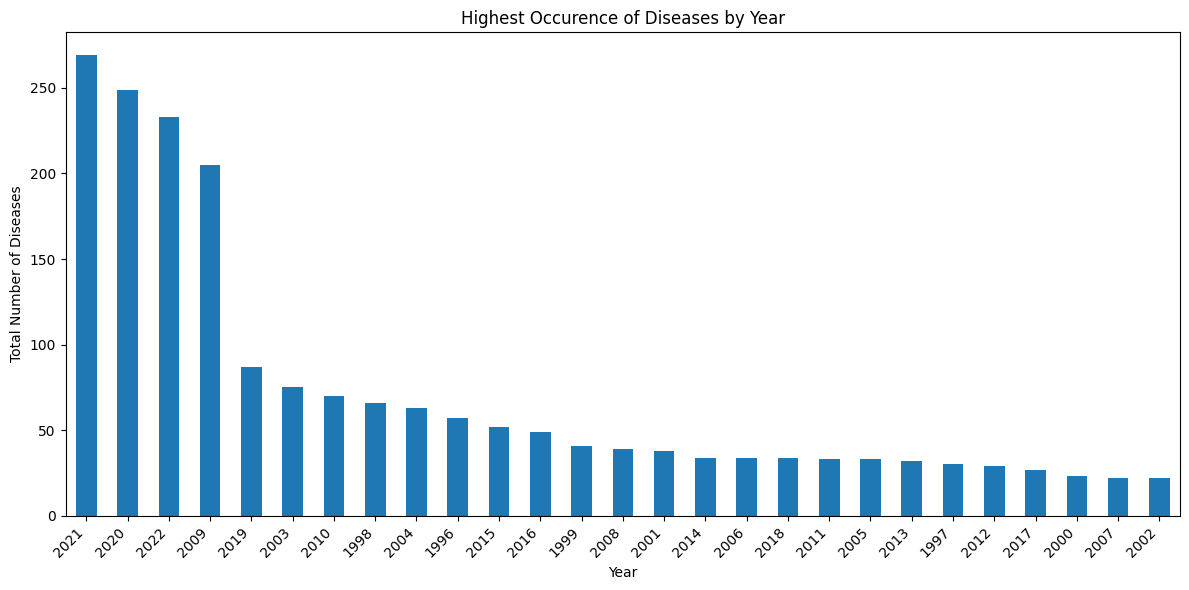

In [ ]:
# Group the data by 'Year' and count the occurrences of each disease
year_disease_counts = new_data.groupby('Year')['Disease'].value_counts()

# Sum the counts for each year
total_diseases_by_year = year_disease_counts.groupby('Year').sum()

# Plotting
plt.figure(figsize=(12, 6))
total_diseases_by_year.sort_values(ascending=False).plot(kind='bar')
plt.title('Highest Occurence of Diseases by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Diseases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

## Getting the 15 highest occurence of diseases in the Target column (Diseases).

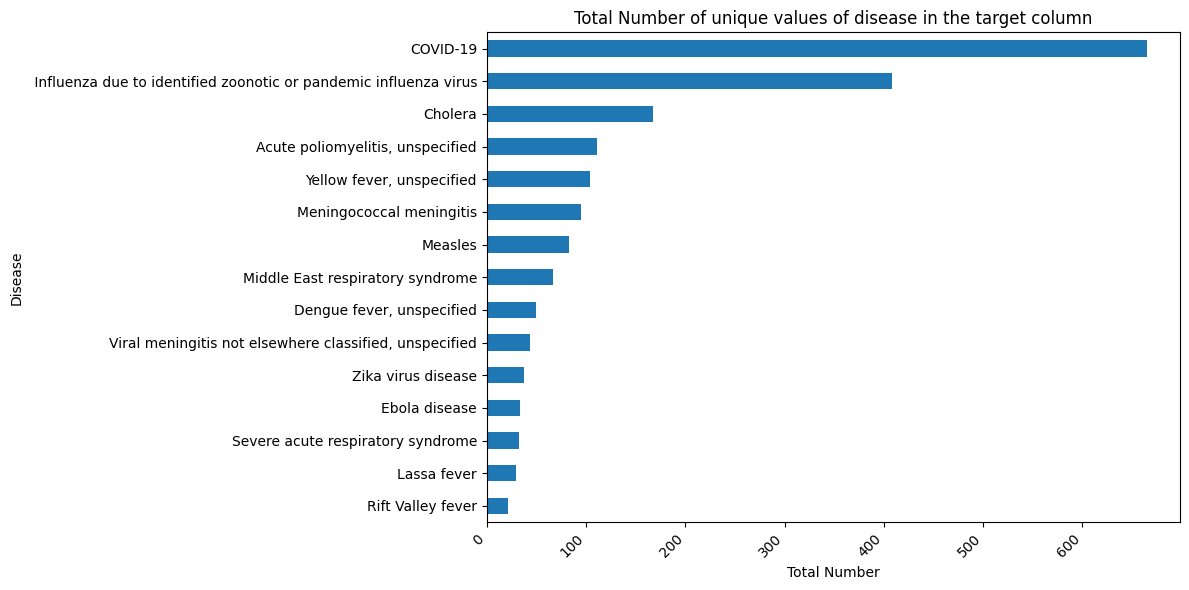

In [ ]:
disease_count = new_data['Disease'].value_counts()
# Plotting
plt.figure(figsize=(12, 6))
disease_count.sort_values(ascending=True).plot(kind='barh')
plt.title('Total Number of unique values of disease in the target column')
plt.xlabel('Total Number')
plt.ylabel('Disease')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()

## Getting the country that has the highest disease per year
* Using Barplot in Seaborn / Bar in Matplotlib

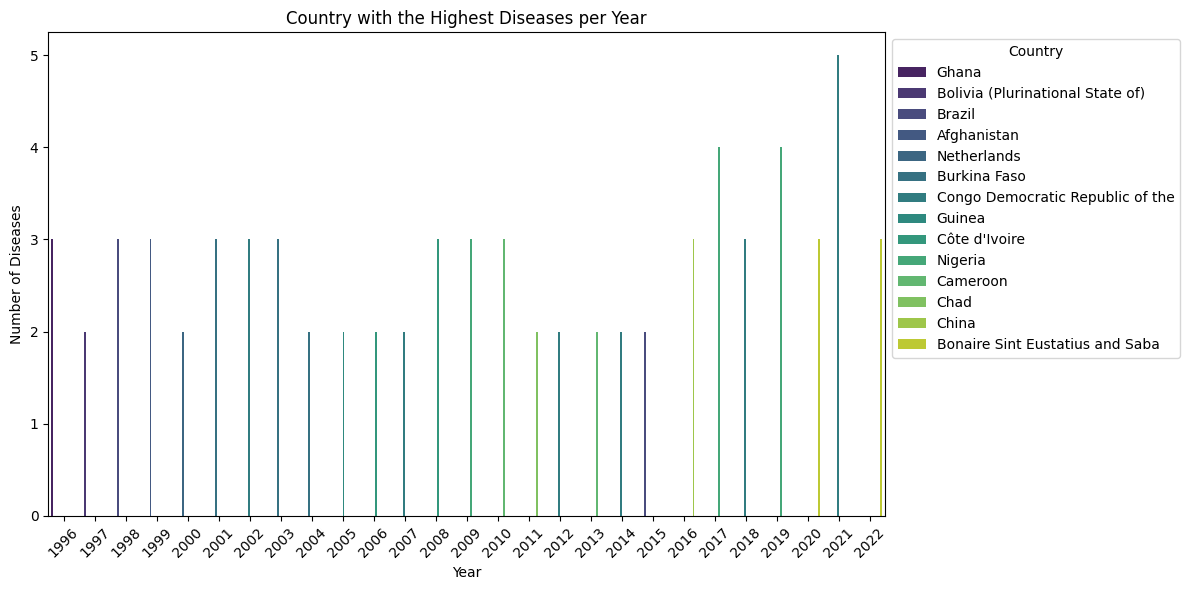

In [ ]:
# Group the data by 'Year' and 'Country' and count the occurrences of each disease
year_country_disease_counts = new_data.groupby(['Year', 'Country'])['Disease'].count().reset_index()

# Find the country with the highest number of diseases for each year
country_with_highest_diseases_per_year = year_country_disease_counts.loc[year_country_disease_counts.groupby('Year')['Disease'].idxmax()]

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Disease', hue='Country', data=country_with_highest_diseases_per_year, palette='viridis')
plt.title('Country with the Highest Diseases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Diseases')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

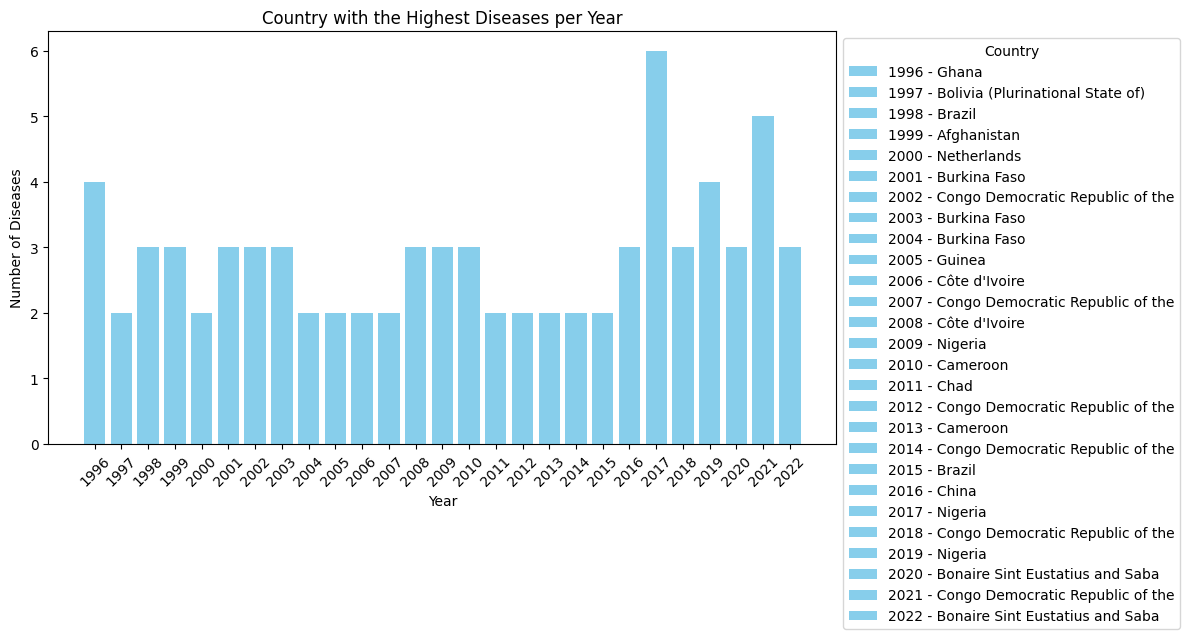

In [ ]:

# Group the data by 'Year' and 'Country' and count the occurrences of each disease
year_country_disease_counts = new_data.groupby(['Year', 'Country'])['Disease'].count()

# Find the country with the highest number of diseases for each year
country_with_highest_diseases_per_year = year_country_disease_counts.groupby('Year').idxmax().apply(lambda x: x[1])

# Plotting
plt.figure(figsize=(12, 6))

for year, country in country_with_highest_diseases_per_year.iteritems():
    year_data = data[(data['Year'] == year) & (data['Country'] == country)]
    plt.bar(year, year_data['Disease'].count(), color='skyblue', label=f'{year} - {country}')

plt.title('Country with the Highest Diseases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Diseases')
plt.xticks(list(country_with_highest_diseases_per_year.index),rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

## Data Encoding
* Encoding the Categorical Columns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer


# Encode categorical variables
# Performing label encoder for ordinal variable
label_encoder = LabelEncoder()
new_data['Country'] = label_encoder.fit_transform(new_data['Country'])

# Perform one-hot encoding for nominal variables
nominal_columns = ['iso2', 'iso3', 'icd10n', 'icd103n', 'icd104n', 'icd10c', 'icd103c', 'icd104c',
                   'icd11c1', 'icd11c2', 'icd11c3', 'icd11l1', 'icd11l2', 'icd11l3', 'DONs']

ohe = OneHotEncoder()
encode = ohe.fit_transform(new_data[nominal_columns])
encode_data = pd.DataFrame(encode.toarray(), columns=ohe.get_feature_names_out())


# Vectorize
tfidf_vectorizer = TfidfVectorizer()
definition_tfidf = tfidf_vectorizer.fit_transform(new_data['Definition'])
# Convert the TF-IDF matrix to a DataFrame and concatenate with the original data
definition_tfidf_df = pd.DataFrame(definition_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Reset the index of 'new_data'
new_data = new_data.reset_index(drop=True)

data = pd.concat([encode_data, new_data[['Country', 'Year', 'Disease']], definition_tfidf_df], axis=1)

# Display the resulting DataFrame
data.head()

,iso2_AD,iso2_AE,iso2_AF,iso2_AG,iso2_AI,iso2_AL,iso2_AM,iso2_AO,iso2_AR,iso2_AS,...,vomiting,weakness,western,white,who,with,without,women,yellow,zika
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.058776,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Disecting the data into X (independent variable) and Y( Dependent Variable or Target Variable)

In [ ]:
X = data.drop(['Disease'], axis=1)
Y = data['Disease']

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,random_state=20)


#Model Evaluation

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score, classification_report, confusion_matrix
def model_evaluation(y_pred,y_test):
  a_score = accuracy_score(y_pred,y_test)
  r_score = recall_score(y_pred,y_test)
  p_score = precision_score(y_pred,y_test)
  f_score = f1_score(y_pred,y_test)
  c_report = classification_report(y_pred,y_test)

  print(f'Accuracy Score - {a_score}')
  print(f'Recall Score - {r_score}')
  print(f'Precision Score - {p_score}')
  print(f'F1 Score - {f_score}')
  print(f'Classification Report - \n {c_report}')

  conf_mat = confusion_matrix(y_pred,y_test)
  sns.set_style(style='white')
  plt.figure(figsize=(12,8))
  heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":12},cmap='Spectral')
  heatmap.set_title('Confusion Matrix Heatmap for \n Epidemic Outbreaks', fontdict={'fontsize':15}, pad=12)
  heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
  heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
  plt.show()


# Model Selection

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rf.predict(X_test)
model_evaluation(y_pred,y_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

# Desision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)


In [ ]:
y_pred = dt.predict(X_test)
model_evaluation(y_pred,y_test)

#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)


LogisticRegression()

Accuracy Score - 0.5897435897435898
Recall Score - 0.2515146918597781
Precision Score - 0.18071825082134357
F1 Score - 0.15891690995779817
Classification Report - 
                                                                    precision    recall  f1-score   support

 Influenza due to identified zoonotic or pandemic influenza virus       0.89      0.69      0.78       124
                                 Acute poliomyelitis, unspecified       0.04      1.00      0.07         1
                                                         COVID-19       1.00      0.72      0.84       172
                                                          Cholera       0.54      0.22      0.31        65
                                        Dengue fever, unspecified       0.00      0.00      0.00         0
                                                    Ebola disease       0.00      0.00      0.00         0
                                                      Lassa fever       0.00      0.0

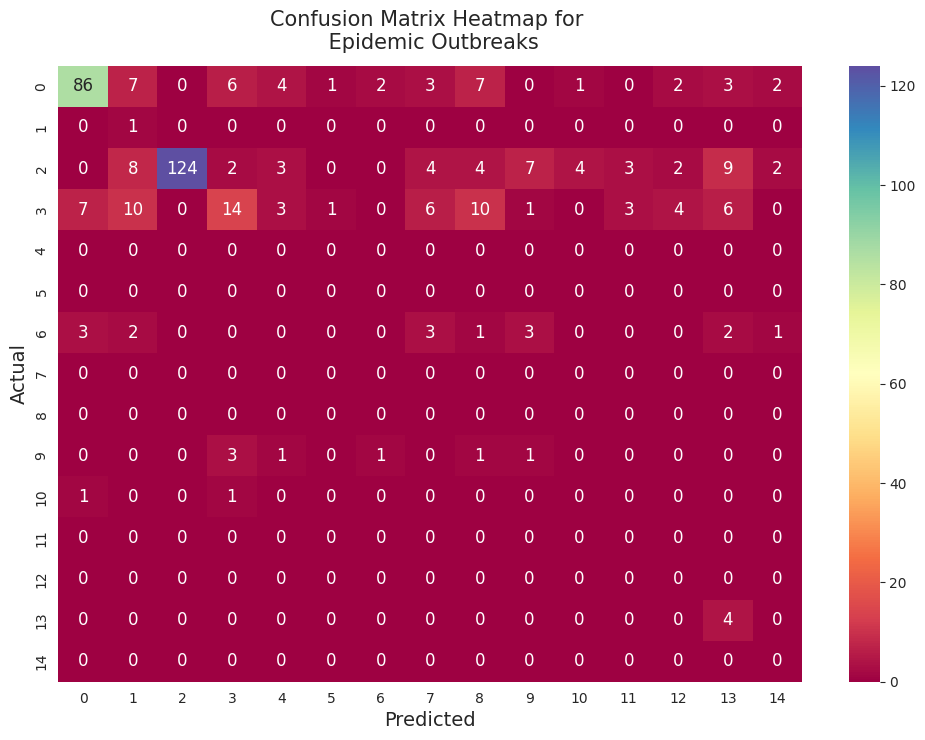

In [ ]:
y_pred = lr.predict(X_test)
model_evaluation(y_pred,y_test)

In [ ]:
# Create a DataFrame from the new data

predict_data = pd.DataFrame({'Country':['Afghanistan'],
                             'iso2': ['AF'] ,
                             'iso3': ['AFG'],
                             'Year': ['2023'],
                             'icd10n':['Intestinal infectious diseases'],
                             'icd103n':['Cholera'],
                             'icd104n':['Classical cholera'],
                             'icd10c':['A00-A09'],
                             'icd103c':['A00'],
                             'icd104c':['A000'],
                             'icd11c1':['1'],
                             'icd11c2':['A00'],
                             'icd11c3':['1A00'],
                             'icd11l1':['Codes for special purposes'],
                             'icd11l2':['Certain zoonotic viral diseases'],
                             'icd11l3':['Severe acute respiratory syndrome'],
                             'DONs':['DON0253, DON0249, DON0248'],
                             'Definition':['Intestinal infection due to Vibrio cholerae'],
                             })

## Encode categorical variables
label_encoder = LabelEncoder()
predict_data['Country'] = label_encoder.fit_transform(predict_data['Country'])

# Perform one-hot encoding for nominal variables
nominal_columns = ['iso2', 'iso3', 'icd10n', 'icd103n', 'icd104n', 'icd10c', 'icd103c', 'icd104c',
                   'icd11c1', 'icd11c2', 'icd11c3', 'icd11l1', 'icd11l2', 'icd11l3', 'DONs']

encode = ohe.transform(predict_data[nominal_columns])
encoded_predict_data = pd.DataFrame(encode.toarray(),columns=ohe.get_feature_names_out())

# Vectorize
v_definition = tfidf_vectorizer.transform(predict_data['Definition'].fillna(''))

# Convert the TF-IDF matrix to a DataFrame and concatenate with the original data
v_definition_df = pd.DataFrame(v_definition.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Reset the index of 'new_data'
predict_data = predict_data.reset_index(drop=True)

final_predict_data = pd.concat([encoded_predict_data, predict_data[['Country', 'Year']], v_definition_df], axis=1)
# Make predictions using the Random Forest model
predictions = rf.predict(final_predict_data)

print(predictions)